# Image Segmentation

In [38]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [93]:
class Partition:
    def __init__(self, partitions= 4):
        self.partitions= partitions
        
    def kmeansClustering(self, Image):
        Image = cv2.GaussianBlur(Image, (7, 7), 0)
        vectorized = Image.reshape(-1, 3)
        vectorized = np.float32(vectorized)
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
        ret, label, center = cv2.kmeans(vectorized,
                                       self.partitions,
                                       None,
                                       criteria,
                                       10,
                                       cv2.KMEANS_RANDOM_CENTERS)
        res = center[label.flatten()]
        segmented_image = res.reshape((Image.shape))
        return label.reshape((Image.shape[0], Image.shape[1])), segmented_image.astype(np.uint8)
    
    def extractComponent(self, Image, label_image, label):
#         return Image[label_image==label]
        component = np.zeros(Image.shape, np.uint8)
        component[label_image==label] = Image[label_image==label]
        return component

In [171]:
og_image = cv2.imread("Images/redbus.jpg")

Original Image


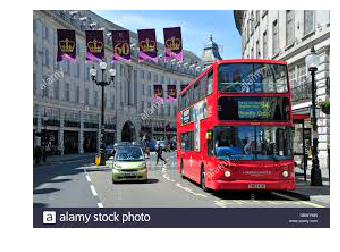

In [185]:
plt.axis('off')
plt.imshow(cv2.cvtColor(og_image, cv2.COLOR_BGR2RGB))
print('Original Image')

In [188]:
clusters = 4
parts = Partition(clusters)

label, seg_image = parts.kmeansClustering(og_image)

Segmented Image


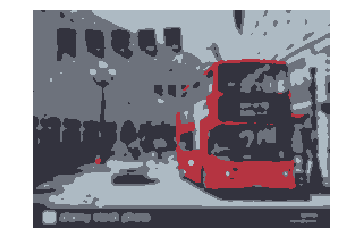

In [189]:
plt.axis('off')
plt.imshow(cv2.cvtColor(seg_image, cv2.COLOR_BGR2RGB))
print('Segmented Image')

Extracted Image


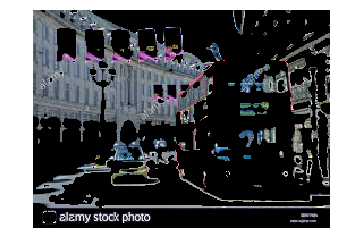

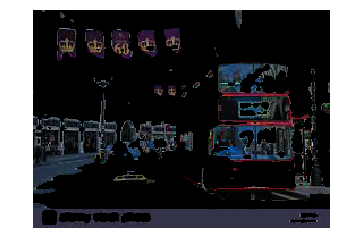

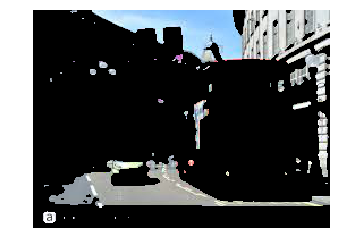

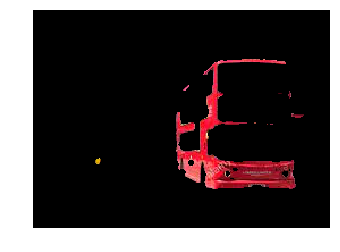

In [190]:
print('Extracted Image')
for l in range(clusters):
    extracted_image = parts.extractComponent(og_image, label, l)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(extracted_image, cv2.COLOR_BGR2RGB))
    plt.show()